## KMEAN CLUSTERING



🌸 **Unveiling the Beauty of Flowers: A Journey into K-means Clustering** 🌸

Embarking on a fascinating journey in the realm of data science, I recently delved into the enchanting world of flowers, seeking to unravel the intricate patterns that define their unique characteristics. 🌺💻

In this project, I harnessed the power of K-means clustering, a powerful unsupervised machine learning algorithm, to group flowers based on shared features. The goal? To unveil natural clusters within the dataset, shedding light on the inherent similarities and differences that make each bloom a masterpiece of nature. 🌷🌿

🔍 **The Quest for Optimal Clusters: The Elbow Method**
A pivotal aspect of this exploration was the quest to determine the optimal number of clusters. Here, the ingenious "Elbow Method" came to the rescue. By evaluating the sum of squared distances between data points and their assigned clusters across a range of cluster numbers, we sought that sweet spot where the reduction in variance sharply slowed—the elbow point. This pivotal discovery paved the way for a more nuanced understanding of our floral data. 📊👩‍🔬

💡 **Why K-means?**
K-means clustering, with its simplicity and effectiveness, proved to be an ideal companion for this endeavor. The algorithm's ability to uncover inherent structures within the dataset offered not only a visual representation of flower groupings but also a deeper insight into the underlying botanical relationships. 🌐🌼

Join me on this odyssey into the heart of data-driven discovery, where algorithms and nature converge to illuminate the beauty of classification. As we cluster flowers into groups, we unlock the secrets hidden within their petals, showcasing the power of machine learning in deciphering the language of flora. 📚🌸

Stay tuned for the blossoming insights that emerge as we navigate the clusters and explore the nuances of floral diversity through the lens of K-means clustering. 🌈✨


---


In [4]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

In [5]:
#Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#check for missing values
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Extracting features (excluding the target variable 'species')
X = df.iloc[:, :-1].values

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use PCA to reduce the feature dimensions for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [8]:
n_clusters=np.arange(1,11)
scores=[]
for c in n_clusters:
 # run k-means clustering on the data and...
    kmeans = KMeans(n_clusters=c)
    model = kmeans.fit(df)
 # compute the average within-cluster distances.
    score = np.abs(model.score(df))
    
    scores.append(score)

c:\users\expression\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\expression\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\expression\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\expression\appdata\local\programs\python\python38\lib\site-packa

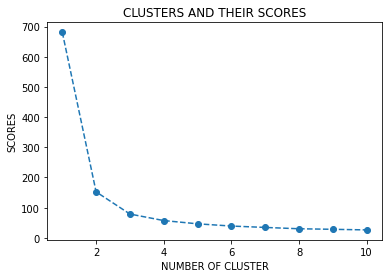

In [10]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(n_clusters, scores, linestyle='--', marker='o')
plt.xlabel('NUMBER OF CLUSTER')
plt.ylabel('SCORES')
plt.title('CLUSTERS AND THEIR SCORES')
plt.show()

In [11]:

kmean = KMeans(n_clusters = 3)
model = kmean.fit(df)
y_pred = kmean.predict(df)

c:\users\expression\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


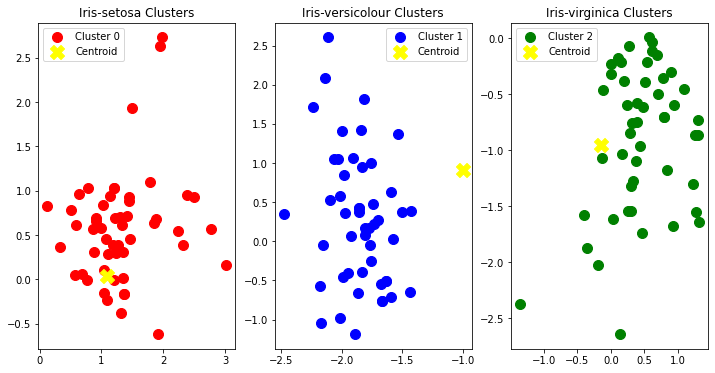

In [14]:
# Based on the Elbow method, let's say the optimal number of clusters is 3
optimal_num_clusters = 3

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Separate the data by class labels
df['Cluster'] = kmeans.labels_

# Visualize clusters and centroids separately for each class
plt.figure(figsize=(12, 6))

# Plot clusters for Iris-setosa
plt.subplot(1, 3, 1)
plt.scatter(X_pca[df['Cluster'] == 0, 0], X_pca[df['Cluster'] == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], s=200, c='yellow', marker='X', label='Centroid')
plt.title('Iris-setosa Clusters')
plt.legend()

# Plot clusters for Iris-versicolour
plt.subplot(1, 3, 2)
plt.scatter(X_pca[df['Cluster'] == 1, 0], X_pca[df['Cluster'] == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s=200, c='yellow', marker='X', label='Centroid')
plt.title('Iris-versicolour Clusters')
plt.legend()

# Plot clusters for Iris-virginica
plt.subplot(1, 3, 3)
plt.scatter(X_pca[df['Cluster'] == 2, 0], X_pca[df['Cluster'] == 2, 1], s=100, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, 1], s=200, c='yellow', marker='X', label='Centroid')
plt.title('Iris-virginica Clusters')
plt.legend()

plt.show()